In [0]:
!pip install --user tensorflow==1.13.1

In [2]:
#We upload all the packages we need
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import math
import os
import scipy.misc
from scipy.stats import itemfreq
from random import sample
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Image manipulation.
import PIL.Image
from IPython.display import display
#from resizeimage import resizeimage

#Panda
import pandas as pd

#Open a Zip File
from zipfile import ZipFile
from io import BytesIO

#check tensorflow version
tf.__version__

'1.13.1'

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [5]:
#with open('/gdrive/Teams Drives/CS147 - Cucumbers/data, 'w') as f:
#  f.write('Hello Google Drive!')
!ls /gdrive/Team\ Drives/CS147\ -\ Cucumbers/data/

labels.csv  test.p  test.zip  train.p  train.zip


In [6]:
train = open('/gdrive/Team Drives/CS147 - Cucumbers/data/train.p', 'rb')
train = pickle.load( train )
train.shape

(10222, 60, 60, 3)

In [7]:
test = open('/gdrive/Team Drives/CS147 - Cucumbers/data/test.p', 'rb')
test = pickle.load( test )
test.shape

(10357, 60, 60, 3)

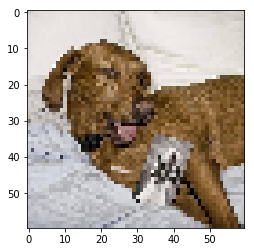

In [8]:
#let's check one image from the train data base
lum_img = train[100,:,:,:]
plt.imshow(lum_img)
plt.show()

In [10]:
#######Upload the zip (input data base)########
labels_raw = open('/gdrive/Team Drives/CS147 - Cucumbers/data/labels.csv')
labels_raw = pd.read_csv(labels_raw, header=0, sep=',', quotechar='"')

#Check 5 random values
labels_raw.sample(5)

,id,breed
5824,931ed9a15a347fd467fc081006da00cf,giant_schnauzer
5002,7e651e77387c1695c7480e7f6c78ae87,groenendael
7328,b78eb9db784ba1849ae8e21a8df79a05,dingo
1781,2c3db3a8da1a65eaef44485bb8477f9b,ibizan_hound
4395,6dc19c50fe72f9b29c2b08fdac6c4220,beagle


In [0]:
Nber_of_breeds = 120

#######Get the N most represented breeds########
def main_breeds(labels_raw, Nber_breeds , all_breeds='TRUE'):
    labels_freq_pd = itemfreq(labels_raw["breed"])
    labels_freq_pd = labels_freq_pd[labels_freq_pd[:, 1].argsort()[::-1]] #[::-1] ==> to sort in descending order
    
    if all_breeds == 'FALSE':
        main_labels = labels_freq_pd[:,0][0:Nber_breeds]
    else: 
        main_labels = labels_freq_pd[:,0][:]
        
    labels_raw_np = labels_raw["breed"].as_matrix() #transform in numpy
    labels_raw_np = labels_raw_np.reshape(labels_raw_np.shape[0],1)

    labels_filtered_index = np.where(labels_raw_np == main_labels)
    
    return labels_filtered_index

labels_filtered_index = main_breeds(labels_raw = labels_raw, Nber_breeds = Nber_of_breeds, all_breeds='FALSE')
labels_filtered = labels_raw.iloc[labels_filtered_index[0],:]
train_filtered = train[labels_filtered_index[0],:,:,:]

print('- Number of images remaining after selecting the {0} main breeds : {1}'.format(Nber_of_breeds, labels_filtered_index[0].shape))
print('- The shape of train_filtered dataset is : {0}'.format(train_filtered.shape))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


- Number of images remaining after selecting the 120 main breeds : (10222,)
- The shape of train_filtered dataset is : (10222, 60, 60, 3)


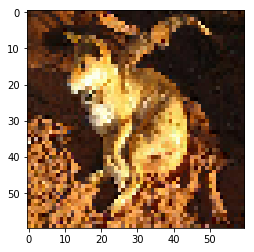

In [0]:
#print(labels_filtered[90])
lum_img = train_filtered[1,:,:,:]
plt.imshow(lum_img)
plt.show()

In [0]:
#We select the labels from the N main breeds
labels = labels_filtered["breed"].as_matrix()
labels = labels.reshape(labels.shape[0],1) #labels.shape[0] looks faster than using len(labels)
labels.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(10222, 1)

In [0]:
#Function to breate one-hot labels
def matrix_Bin(labels):
    labels_bin=np.array([])

    labels_name, labels0 = np.unique(labels, return_inverse=True)
    labels0
    
    for _, i in enumerate(itemfreq(labels0)[:,0].astype(int)):
        labels_bin0 = np.where(labels0 == itemfreq(labels0)[:,0][i], 1., 0.)
        labels_bin0 = labels_bin0.reshape(1,labels_bin0.shape[0])

        if (labels_bin.shape[0] == 0):
            labels_bin = labels_bin0
        else:
            labels_bin = np.concatenate((labels_bin,labels_bin0 ),axis=0)

    print("Nber SubVariables {0}".format(itemfreq(labels0)[:,0].shape[0]))
    labels_bin = labels_bin.transpose()
    print("Shape : {0}".format(labels_bin.shape))
    
    return labels_name, labels_bin

In [0]:
labels_name, labels_bin = matrix_Bin(labels = labels)
labels_bin[0:9]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  


Nber SubVariables 120
Shape : (10222, 120)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  app.launch_new_instance()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
for breed in range(len(labels_name)):
    print('Breed {0} : {1}'.format(breed,labels_name[breed]))

Breed 0 : affenpinscher
Breed 1 : afghan_hound
Breed 2 : african_hunting_dog
Breed 3 : airedale
Breed 4 : american_staffordshire_terrier
Breed 5 : appenzeller
Breed 6 : australian_terrier
Breed 7 : basenji
Breed 8 : basset
Breed 9 : beagle
Breed 10 : bedlington_terrier
Breed 11 : bernese_mountain_dog
Breed 12 : black-and-tan_coonhound
Breed 13 : blenheim_spaniel
Breed 14 : bloodhound
Breed 15 : bluetick
Breed 16 : border_collie
Breed 17 : border_terrier
Breed 18 : borzoi
Breed 19 : boston_bull
Breed 20 : bouvier_des_flandres
Breed 21 : boxer
Breed 22 : brabancon_griffon
Breed 23 : briard
Breed 24 : brittany_spaniel
Breed 25 : bull_mastiff
Breed 26 : cairn
Breed 27 : cardigan
Breed 28 : chesapeake_bay_retriever
Breed 29 : chihuahua
Breed 30 : chow
Breed 31 : clumber
Breed 32 : cocker_spaniel
Breed 33 : collie
Breed 34 : curly-coated_retriever
Breed 35 : dandie_dinmont
Breed 36 : dhole
Breed 37 : dingo
Breed 38 : doberman
Breed 39 : english_foxhound
Breed 40 : english_setter
Breed 41 : e

In [0]:
labels[0:9]

array([['boston_bull'],
       ['dingo'],
       ['pekinese'],
       ['bluetick'],
       ['golden_retriever'],
       ['bedlington_terrier'],
       ['bedlington_terrier'],
       ['borzoi'],
       ['basenji']], dtype=object)

In [0]:
#You can proceed backward with np.argmax to find the breed of an image
labels_cls = np.argmax(labels_bin, axis=1)
labels_name[labels_cls[2]]

'pekinese'

walker_hound


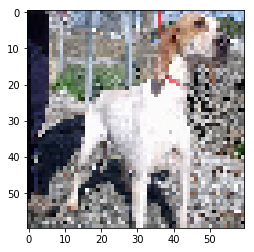

In [0]:
i=11
print(labels_name[labels_cls[i]])
lum_img = train_filtered[i,:,:,:]
plt.imshow(lum_img)
plt.show()

In [0]:
num_validation = 0.30
X_train, X_validation, y_train, y_validation = train_test_split(train_filtered, labels_bin, test_size=num_validation, random_state=6)
X_train.shape

(7155, 60, 60, 3)

In [0]:
#from the one-hot database we can find the breed.
df_validation_toPred_cls = np.argmax(y_validation, axis=1)
df_validation_toPred_cls[0:9]

array([ 16,  39,   5,  89,  77, 113,  68,  15,  23])

appenzeller
5


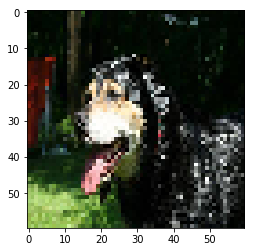

In [0]:
i=2
print(labels_name[df_validation_toPred_cls[i]])
print(df_validation_toPred_cls[i])
lum_img = X_validation[i,:,:,:]
plt.imshow(lum_img)
plt.show()

In [0]:
# Our images are 100 pixels in each dimension.
image_resize = 60
img_size = image_resize

# Number of colour channels for the images: 3
num_channels = 3

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Image Shape
img_shape = (img_size, img_size, num_channels)

# Number of classes : 5 breeds
num_classes = Nber_of_breeds

In [0]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
#outputs random value from a truncated normal distribution

def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))
#outputs the constant value 0.05

In [0]:
def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True,
                   use_dropout=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    # This format is determined by the TensorFlow API.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    # Create the TensorFlow operation for convolution.
    # Note the strides are set to 1 in all dimensions.
    # The first and last stride must always be 1,
    # because the first is for the image-number and
    # the last is for the input-channel.
    # But e.g. strides=[1, 2, 2, 1] would mean that the filter
    # is moved 2 pixels across the x- and y-axis of the image.
    # The padding is set to 'SAME' which means the input image
    # is padded with zeroes so the size of the output is the same.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer += biases

    # Use pooling to down-sample the image resolution?
    if use_pooling:
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    # It calculates max(x, 0) for each input pixel x.
    # This adds some non-linearity to the formula and allows us
    # to learn more complicated functions.
    layer = tf.nn.relu(layer)
    
    if use_dropout:
        layer = tf.nn.dropout(layer,keep_prob_conv)

    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights

In [0]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features

In [0]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True,
                 use_dropout=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)
    
    if use_dropout:
        layer = tf.nn.dropout(layer,keep_prob_fc)
        
    return layer

In [0]:
x = tf.placeholder(tf.float32, shape=[None, img_size, img_size, num_channels], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels]) #-1 put everything as 1 array
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, axis=1)
keep_prob_fc=tf.placeholder(tf.float32)
keep_prob_conv=tf.placeholder(tf.float32)

In [0]:
# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 32         # There are 32 of these filters.

# Convolutional Layer 2.
filter_size2 = 4          # Convolution filters are 4 x 4 pixels.
num_filters2 = 64      # There are 64 of these filters.

# Convolutional Layer 3.
filter_size3 = 3          # Convolution filters are 3 x 3 pixels.
num_filters3 = 128      # There are 128 of these filters.

# Fully-connected layer.
fc_size = 500 

In [0]:
layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True,
                   use_dropout=False)
    
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True,
                   use_dropout=False)
    
layer_conv3, weights_conv3 = \
    new_conv_layer(input=layer_conv2,
                   num_input_channels=num_filters2,
                   filter_size=filter_size3,
                   num_filters=num_filters3,
                   use_pooling=True,
                   use_dropout=True)

In [0]:
layer_flat, num_features = flatten_layer(layer_conv3)

In [0]:
#Train
layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True,
                         use_dropout=True)

layer_fc1

layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False,
                         use_dropout=False)

layer_fc2

<tf.Tensor 'add_9:0' shape=(?, 120) dtype=float32>

In [0]:
#Prediction :
y_pred = tf.nn.softmax(layer_fc2)
y_pred_cls = tf.argmax(y_pred, axis=1)

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=y_true)
cost = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
session = tf.Session()

def init_variables():
    session.run(tf.global_variables_initializer())

In [0]:
batch_size = 50

#function next_batch
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [0]:
def optimize(num_iterations, X):
    global total_iterations
    
    start_time = time.time()
    
    #array to plot
    losses = {'train':[], 'validation':[]}
    
    for i in range(num_iterations):
            total_iterations += 1
            # Get a batch of training examples.
            # x_batch now holds a batch of images and
            # y_true_batch are the true labels for those images.
            x_batch, y_true_batch = next_batch(batch_size, X_train, y_train)

            # Put the batch into a dict with the proper names
            # for placeholder variables in the TensorFlow graph.
            feed_dict_train = {x: x_batch,
                               y_true: y_true_batch,
                               keep_prob_conv : 0.3,
                               keep_prob_fc : 0.4}
            feed_dict_validation = {x: X_validation,
                               y_true: y_validation,
                               keep_prob_conv : 1,
                               keep_prob_fc : 1}
            
            # Run the optimizer using this batch of training data.
            # TensorFlow assigns the variables in feed_dict_train
            # to the placeholder variables and then runs the optimizer.
            session.run(optimizer, feed_dict=feed_dict_train)
            
            acc_train = session.run(accuracy, feed_dict=feed_dict_train)
            acc_validation = session.run(accuracy, feed_dict=feed_dict_validation)
            losses['train'].append(acc_train)
            losses['validation'].append(acc_validation)
            
            # Print status every X iterations.
            if (total_iterations % X == 0) or (i ==(num_iterations -1)):
            # Calculate the accuracy on the training-set.
                                
                msg = "Iteration: {0:>6}, Training Accuracy: {1:>6.1%}, Validation Accuracy: {2:>6.1%}"
                print(msg.format(total_iterations, acc_train, acc_validation))
                
    
    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))
    
    plt.plot(losses['train'], label='Training loss')
    plt.plot(losses['validation'], label='Validation loss')
    plt.legend()
    _ = plt.ylim()

In [0]:
init_variables()
total_iterations = 0

Iteration:    250, Training Accuracy:   0.0%, Validation Accuracy:   0.9%
Iteration:    500, Training Accuracy:   0.0%, Validation Accuracy:   1.5%
Iteration:    750, Training Accuracy:   4.0%, Validation Accuracy:   1.2%
Iteration:   1000, Training Accuracy:   0.0%, Validation Accuracy:   2.1%
Iteration:   1250, Training Accuracy:   0.0%, Validation Accuracy:   2.2%
Iteration:   1500, Training Accuracy:   8.0%, Validation Accuracy:   3.3%
Iteration:   1750, Training Accuracy:   0.0%, Validation Accuracy:   3.3%
Iteration:   2000, Training Accuracy:   0.0%, Validation Accuracy:   3.1%
Iteration:   2250, Training Accuracy:   6.0%, Validation Accuracy:   3.9%
Iteration:   2500, Training Accuracy:   4.0%, Validation Accuracy:   4.4%
Iteration:   2750, Training Accuracy:   8.0%, Validation Accuracy:   4.9%
Iteration:   3000, Training Accuracy:   4.0%, Validation Accuracy:   4.8%
Iteration:   3250, Training Accuracy:   6.0%, Validation Accuracy:   5.2%
Iteration:   3500, Training Accuracy: 

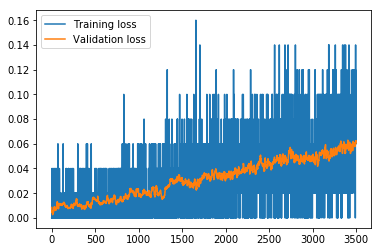

In [0]:
optimize(num_iterations=3500, X=250)

In [0]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 12
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(4, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

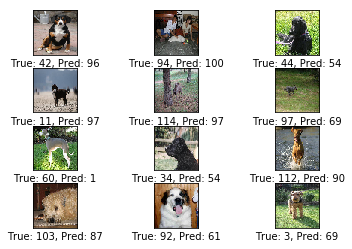

In [0]:
feed_dict_validation = {x: X_validation,
                    y_true: y_validation,
                    keep_prob_conv : 1,
                    keep_prob_fc : 1}
df_validation_Predicted_cls = session.run(y_pred_cls, feed_dict=feed_dict_validation)

start = 40
end = 52

plot_images(images=X_validation[start:end],
            cls_true=df_validation_toPred_cls[start:end],
            cls_pred=df_validation_Predicted_cls [start:end])

True : 9 / beagle
Pred : 13 / blenheim_spaniel


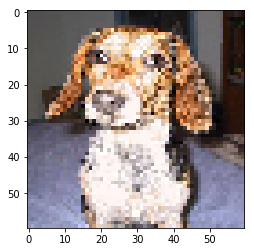

In [0]:
i = 30
print(("True : {0} / {1}").format(df_validation_toPred_cls[i], labels_name[df_validation_toPred_cls[i]]))
print(("Pred : {0} / {1}").format(df_validation_Predicted_cls[i], labels_name[df_validation_Predicted_cls[i]]))

lum = X_validation[i,:,:,:]
plt.imshow(lum)
plt.show()